In [21]:
# import library yang dibutuhkan

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import rawpy 
import tifffile as tif
import imageio as io


Mengurai Citra RAW ke masing-masing kanal Red, Green, dan Blue

In [11]:
# input: citra raw (CR2) 
# setiap citra akan memiliki nama file yang berbeda
# nama file citra raw akan diubah sesuai dengan nama file citra yang akan diolah
# misal: citra-hilal.CR2 untuk citra pertama, citra-hilal-2.CR2 untuk citra kedua, dst.

with rawpy.imread('citra-hilal.CR2') as raw:
    rgb = raw.postprocess(gamma=(1,1), no_auto_bright=True, output_bps=16)

# mengurai citra raw pada masing-masing kanal Red, Greenn, dan Blue
R = rgb[:,:,0]
G = rgb[:,:,1]
B = rgb[:,:,2]

# output: citra (tif) pada masing-masing kanal
#format nama file citra hasil uraian pada setiap kanal dibedakan
# misal: R-citra-hilal.CR2.tif, G-citra-hilal.CR2.tif, B-citra-hilal.CR2.tif

io.imsave('R-citra-hilal.CR2.tif', R) # simpan citra kanal Merah 
io.imsave('G-citra-hilal.CR2.tif', G) # simpan citra kanal Green
io.imsave('B-citra-hilal.CR2.tif', B) # simpan citra kanal Blue

# lakukan hal yang sama untuk mengurai citra raw kedua, ketiga, dst. ke dalam masing-masing kanal



Mencocokkan citra template dengan citra hilal kanal tertentu

In [22]:
# Menampilkan isi citra dari salah satu kanal
# output: array citra
citra = tif.imread('R-citra-hilal.CR2.tif')
citra



array([[ 787,  687,  580, ...,  790,  683,  732],
       [ 749,  706,  566, ...,  785,  686,  767],
       [ 765,  748,  660, ...,  820,  644,  726],
       ...,
       [ 614,  688,  779, ...,  958, 1271, 1253],
       [ 673,  735,  836, ...,  813, 1009, 1004],
       [ 600,  740,  960, ...,  650,  723,  760]], dtype=uint16)

In [23]:
# Menampilkan citra dari salah satu kanal

def basic_showImg(img, size=4):
    '''Shows an image in a numpy.array type. Syntax:
        basic_showImg(img, size=4), where
            img = image numpy.array;
            size = the size to show the image. Its value is 4 by default.
    '''
    plt.figure()#figsize=(size,size))
    plt.imshow(img)
    plt.show()

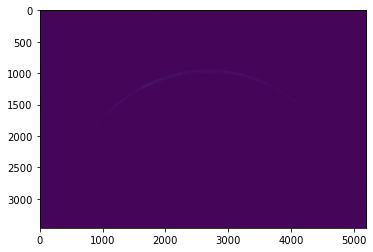

In [24]:
# Menampilkan citra dari salah satu kanal

basic_showImg(citra, 8)

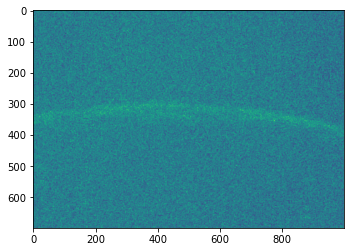

In [15]:
# Menampilkan citra hilal template 
# Format citra template tidak harus tif
# Format citra template pada contoh adalah tif

template = tif.imread('citra-template-hilal.tif')
basic_showImg(template, 8)

(3464, 5202, 3)
(700, 1000, 3)


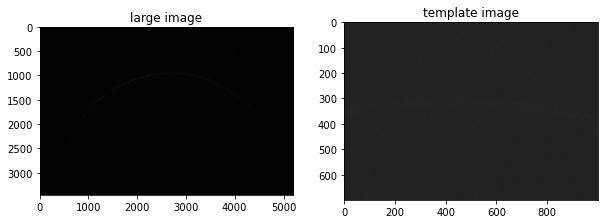

In [25]:
# Menampilkan citra hilal salah satu kanal dan citra template dalam satu gambar

# citra hilal
img_large = cv.imread('R-citra-hilal.CR2.tif')

# citra template
img_small = cv.imread('citra-template-hilal.tif')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(img_large, cv.COLOR_BGR2RGB))
ax[0].set_title('large image')
ax[1].imshow(cv.cvtColor(img_small, cv.COLOR_BGR2RGB))
ax[1].set_title('template image')

print(img_large.shape)
print(img_small.shape)

Text(0.5, 1.0, 'large image')

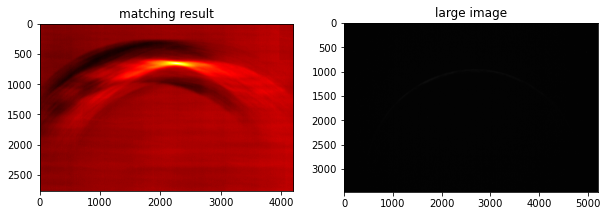

In [26]:
# Mencocokkan citra template dengan citra hilal salah satu kanal

large_copy = img_large.copy()
res = cv.matchTemplate(image=large_copy,
                        templ=img_small,
                        method=cv.TM_CCOEFF_NORMED)

# Metode yang dipakai adalah 'cv.TM_CCOEFF_NORMED' karena hasilnya yang paling baik
# Metode lainnya yang bisa digunakan untuk mencocokkan citra template dengan citra hilal antara lain:
# cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'


# Menampilkan intensitas visual hasil pencocokan citra template dengan citra hilal salah satu kanal
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(res, cmap='hot')
ax[0].set_title('matching result')
ax[1].imshow(cv.cvtColor(img_large, cv.COLOR_BGR2RGB))
ax[1].set_title('large image')


In [27]:
# Menampilkan koordinat letak citra template yang cocok dengan citra hilal salah satu kanal
# output: koordinat letak citra template yang cocok dengan citra hilal salah satu kanal

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
print(min_loc)
print(max_loc)
print(min_val)
print(max_val)



(1069, 524)
(2260, 652)
-0.06021362543106079
0.2174079716205597


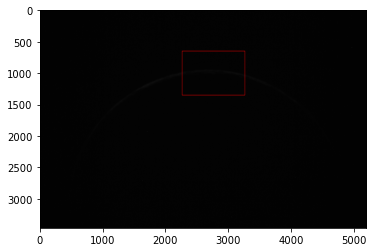

In [28]:
# Membuat kotak pada citra hilal salah satu kanal yang menunjukkan letak citra template yang cocok
w, h, c = img_small.shape

top_left = max_loc
bottom_right = (top_left[0] + h, top_left[1] + w)

cv.rectangle(img=large_copy, 
              pt1=top_left, 
              pt2=bottom_right, 
              color=(0,0,255), 
              thickness=5);


plt.imshow(cv.cvtColor(large_copy, cv.COLOR_BGR2RGB))

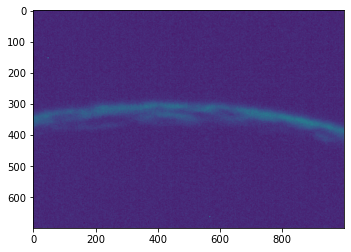

In [29]:
# Melakukan crop pada citra hilal salah satu kanal sesuai kotak yang telah dibuat
# output: citra hasil crop

img_large = tif.imread('R-citra-hilal.CR2.tif')
crop_img = img_large[top_left[1]:top_left[1]+w, top_left[0]:top_left[0]+h]
plt.imshow(crop_img)

# Menyimpan citra hasil crop
# Bedakan nama file citra hasil crop dengan nama file citra citra hilal pada kanal tertentu
# Misal: C-R-citra-hilal.CR2.tif untuk citra hasil crop kanal Merah, C-G-citra-hilal.CR2.tif untuk citra hasil crop kanal Green, C-B-citra-hilal.CR2.tif untuk citra hasil crop kanal Blue

tif.imwrite('C-R-citra-hilal.CR2.tif', crop_img)

Mengukur intensitas citra hasil crop ehingga mendapatkan nilai kecerlangan di daerah bulan yang tersinari, langit, dan daerah bulan yang tidak tersinari

In [32]:
# Menampilkan array citra hasil crop
# output: array citra hasil crop
image_crop = tif.imread('C-R-citra-hilal.CR2.tif')
image_crop

array([[ 966, 1069, 1274, ...,  964,  803,  771],
       [ 973, 1283, 1586, ...,  882,  727,  686],
       [ 998, 1123, 1116, ...,  750,  738,  686],
       ...,
       [1067, 1046, 1080, ...,  979, 1037,  886],
       [ 904,  850,  810, ...,  876,  855,  825],
       [ 680,  584,  548, ...,  724,  737,  690]], dtype=uint16)

Bulan : 1877.707
Langit : 929.0300733333333
Gelap : 946.5699433333334


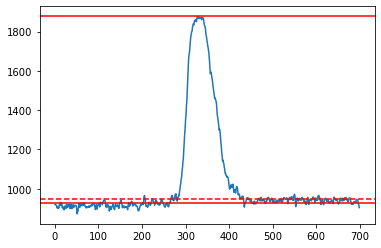

In [35]:
# Menampilkan  grafik rata-rata count pada setiap baris citra hasil crop
# output: rata-rata count pada setiap baris citra hasil crop

plt.plot(np.mean(image_crop ,axis=1))

# nilai rata-rata count untuk bulan, langit, dan bagian gelap bulan
# output: nilai rata-rata count untuk bulan, langit, dan bagian gelap bulan

bul = np.max(np.mean(image_crop, axis=1))
lan = np.mean(np.mean(image_crop[0:300], axis=1))
gel = np.mean(np.mean(image_crop[400:700], axis=1))

print('Bulan :', bul)
print('Langit :', lan)
print('Gelap :', gel)

# menambahkan garis pada masing-masing nilai rata-rata count untuk bulan, langit, dan bagian gelap bulan

plt.axhline(y=bul, color='r', linestyle='-')
plt.axhline(y=lan, color='r', linestyle='-')
plt.axhline(y=gel, color='r', linestyle='--')


In [36]:
# Menghitung nilai kontras citra hasil crop
# output: nilai kontras citra hasil crop

c=(bul+lan)/lan
c

# lakukan proses yang sama untuk citra hilal kanal lainnya

3.0211477043610024